# Hypothesis Testing for NBA Dataset

The main objective of the hypothesis tests we will run in this section is to test whether the means of two groups are equal. We would like to find out if there is a significant difference in the average points scored between positions as well as testing the scoring averages of playoff performing teams vs. non playoff teams.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from random import sample
games = pd.read_csv('C:/Users/michael.thabane/Documents/Springboard/Capstone2/nba-games/games.csv')
games_details = pd.read_csv('C:/Users/michael.thabane/Documents/Springboard/Capstone2/nba-games/games_details.csv')
players = pd.read_csv('C:/Users/michael.thabane/Documents/Springboard/Capstone2/nba-games/players.csv')
standings = pd.read_csv('C:/Users/michael.thabane/Documents/Springboard/Capstone2/nba-games/ranking.csv')

#### Import Dataset from Data Wrangling Notebook

In [2]:
final_boxscore = pd.read_csv('C:/Users/michael.thabane/Documents/Springboard/Capstone2/final_boxscore.csv')

In [3]:
siakam_stats = final_boxscore.loc[final_boxscore['PLAYER_ID'] == 1627783]
siakam_stats.reset_index(drop=True)

,SEASON,GAME_ID,GAME_DATE_EST,TEAM_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,GAME_LOC,PLAYER_ID,...,PF,PLUS_MINUS,TOT_PTS,TOT_AST,TOT_REB,TOT_FG_PCT,TOT_FT_PCT,TOT_FG3_PCT,PTSL5,PTSL3
0,2019,21900898,2020-03-01,1610612761,1610612743,1610612761,TOR,Toronto,AWAY,1627783,...,5.0,-13.0,118.0,24.0,36.0,0.461,0.897,0.263,22.666667,20.750000
1,2019,21900879,2020-02-28,1610612761,1610612761,1610612766,TOR,Toronto,HOME,1627783,...,2.0,6.0,96.0,19.0,45.0,0.347,0.690,0.233,25.666667,26.000000
2,2019,21900858,2020-02-25,1610612761,1610612761,1610612749,TOR,Toronto,HOME,1627783,...,3.0,-20.0,97.0,21.0,43.0,0.352,0.714,0.346,25.000000,24.000000
3,2019,21900843,2020-02-23,1610612761,1610612761,1610612754,TOR,Toronto,HOME,1627783,...,2.0,29.0,127.0,32.0,57.0,0.511,0.889,0.386,23.833333,27.000000
4,2019,21900829,2020-02-21,1610612761,1610612761,1610612756,TOR,Toronto,HOME,1627783,...,1.0,16.0,118.0,24.0,48.0,0.525,0.909,0.378,24.500000,26.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,2016,11600090,2016-10-19,1610612761,1610612765,1610612761,TOR,Toronto,AWAY,1627783,...,5.0,1.0,103.0,20.0,47.0,0.432,0.783,0.429,5.800000,5.000000
342,2016,11600059,2016-10-13,1610612761,1610612739,1610612761,TOR,Toronto,AWAY,1627783,...,4.0,1.0,119.0,31.0,39.0,0.577,0.900,0.440,5.500000,5.500000
343,2016,11600019,2016-10-05,1610612761,1610612746,1610612761,TOR,Toronto,AWAY,1627783,...,2.0,4.0,98.0,13.0,32.0,0.442,0.774,0.353,5.333333,5.333333
344,2016,11600004,2016-10-03,1610612761,1610612761,1610612743,TOR,Toronto,HOME,1627783,...,2.0,1.0,106.0,15.0,43.0,0.433,0.778,0.318,4.500000,4.500000


In [4]:
harden_stats = final_boxscore.loc[final_boxscore['PLAYER_ID'] == 201935]
harden_stats.reset_index(drop=True)

,SEASON,GAME_ID,GAME_DATE_EST,TEAM_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,GAME_LOC,PLAYER_ID,...,PF,PLUS_MINUS,TOT_PTS,TOT_AST,TOT_REB,TOT_FG_PCT,TOT_FT_PCT,TOT_FG3_PCT,PTSL5,PTSL3
0,2019,21900892,2020-02-29,1610612745,1610612738,1610612745,HOU,Houston,AWAY,201935,...,3.0,9.0,111.0,17.0,53.0,0.418,0.778,0.273,32.833333,31.50
1,2019,21900870,2020-02-26,1610612745,1610612745,1610612763,HOU,Houston,HOME,201935,...,4.0,7.0,140.0,22.0,44.0,0.559,0.867,0.460,34.000000,33.50
2,2019,21900853,2020-02-24,1610612745,1610612745,1610612752,HOU,Houston,HOME,201935,...,3.0,3.0,123.0,20.0,38.0,0.500,0.677,0.333,34.333333,36.50
3,2019,21900841,2020-02-22,1610612745,1610612762,1610612745,HOU,Houston,AWAY,201935,...,3.0,24.0,120.0,20.0,42.0,0.489,0.714,0.417,30.500000,34.25
4,2019,21900825,2020-02-20,1610612745,1610612744,1610612745,HOU,Houston,AWAY,201935,...,3.0,32.0,135.0,31.0,36.0,0.529,0.909,0.510,30.833333,32.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,2009,10900096,2009-10-20,1610612760,1610612760,1610612759,OKC,Oklahoma City,HOME,201935,...,4.0,NaN,102.0,16.0,35.0,0.483,0.619,0.313,19.833333,11.75
1011,2009,10900087,2009-10-19,1610612760,1610612745,1610612760,OKC,Oklahoma City,AWAY,201935,...,4.0,NaN,85.0,20.0,42.0,0.427,0.655,0.250,22.666667,10.50
1012,2009,10900048,2009-10-12,1610612760,1610612760,1610612756,OKC,Oklahoma City,HOME,201935,...,3.0,NaN,110.0,25.0,50.0,0.471,0.724,0.529,26.166667,22.75
1013,2009,10900036,2009-10-10,1610612760,1610612740,1610612760,OKC,Oklahoma City,AWAY,201935,...,4.0,NaN,79.0,20.0,36.0,0.378,0.800,0.214,30.500000,28.50


#### Get data for only starting players

In [5]:
Start_guard = final_boxscore.loc[final_boxscore['START_POSITION'] == 'G']
Start_forward = final_boxscore.loc[final_boxscore['START_POSITION'] == 'F']
Start_Center = final_boxscore.loc[final_boxscore['START_POSITION'] == 'C']
Starters = Start_guard.append(Start_forward.append(Start_Center))
Starters = Starters.reset_index(drop= True)

In [6]:
desc = Starters['PTS'].groupby([Starters['SEASON'], Starters['START_POSITION']]).describe()
final = pd.DataFrame(desc)
SEASON = pd.DataFrame(final.droplevel('START_POSITION').index)
SP = pd.DataFrame(final.droplevel('SEASON').index)
final = final.reset_index(drop= True)
final_desc = pd.concat([SEASON, SP, final], axis=1, sort=False)
final_desc

,SEASON,START_POSITION,count,mean,std,min,25%,50%,75%,max
0,2003,C,2541.0,9.582448,6.755167,0.0,4.0,8.0,13.0,43.0
1,2003,F,5084.0,14.030881,7.861207,0.0,8.0,13.0,20.0,50.0
2,2003,G,5083.0,14.668896,8.192847,0.0,9.0,14.0,20.0,62.0
3,2004,C,2627.0,10.611724,7.589776,0.0,5.0,9.0,14.0,50.0
4,2004,F,5255.0,14.596384,8.123651,0.0,8.0,14.0,20.0,55.0
5,2004,G,5255.0,14.750904,8.750452,0.0,8.0,14.0,20.0,60.0
6,2005,C,2638.0,9.658453,6.877035,0.0,4.0,8.0,14.0,41.0
7,2005,F,5276.0,14.698446,8.711590,0.0,8.0,14.0,20.0,52.0
8,2005,G,5276.0,15.316717,9.187873,0.0,9.0,14.0,21.0,81.0
9,2006,C,2618.0,10.842628,7.630139,0.0,5.0,10.0,15.0,43.0


Text(0.5, 1.0, 'Boxplot of PTS Scored by Position')

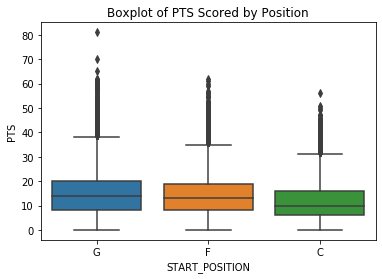

In [7]:
box = sns.boxplot(x = "START_POSITION", y="PTS", data=Starters)
plt.title("Boxplot of PTS Scored by Position")

The boxplot only shows that centers clearly score less point than both guards and center. However, we will test the following hypotheses: 1) H0 = Are the average points scored by centers equal to the average points scored by guards. 2) H0 = Are the average points scored by centers equal to the average points scored by forwards. 3) H0 = Are the average points scored by guards equal to the average points scored by forwards.

In [8]:
# perform t-test on the points scored by centers vs the points scored by guards
stat, p = stats.ttest_ind(Start_Center['PTS'], Start_guard['PTS'], equal_var=False)
dof = len(Start_Center['PTS']) + len(Start_guard['PTS']) - 2
critical = stats.t.ppf(0.95,dof)
print('Degress of Freedom = %d' % dof)
print('p value = %d' % p)
print('Test Statistic = %d' % stat)
print('Critical Value = %d' % critical)

Degress of Freedom = 132821
p value = 0
Test Statistic = -76
Critical Value = 1


From this result we can conclude that there is a significant difference between average points scored by centers and the average points scored by guards; H0 is rejected since p-value less than 0.05.

In [9]:
# perform t-test on the points scored by centers vs the points scored by forwards
stat, p = stats.ttest_ind(Start_Center['PTS'], Start_forward['PTS'], equal_var=False)
dof = len(Start_Center['PTS']) + len(Start_forward['PTS']) - 2
critical = stats.t.ppf(0.95,dof)
print('Degress of Freedom = %d' % dof)
print('p value = %d' % p)
print('Test Statistic = %d' % stat)
print('Critical Value = %d' % critical)

Degress of Freedom = 132823
p value = 0
Test Statistic = -58
Critical Value = 1


From this result we can conclude that there is a significant difference between average points scored by centers and the average points scored by forwards; H0 is rejected since p-value less than 0.05.

In [10]:
# perform t-test on the points scored by guards vs the points scored by forwards
stat, p = stats.ttest_ind(Start_guard['PTS'], Start_forward['PTS'], equal_var=False)
dof = len(Start_guard['PTS']) + len(Start_forward['PTS']) - 2
critical = stats.t.ppf(0.95,dof)
print('Degress of Freedom = %d' % dof)
print('p value = %d' % p)
print('Test Statistic = %d' % stat)
print('Critical Value = %d' % critical)

Degress of Freedom = 177098
p value = 0
Test Statistic = 21
Critical Value = 1


From this result we can conclude that there is a significant difference between average points scored by guards and the average points scored by forwards; H0 is rejected since p-value less than 0.05.

In [11]:
# convert date string to datetime variable
from datetime import datetime
standings['STANDINGSDATE'] = [datetime.strptime(x,'%Y-%m-%d') for x in standings['STANDINGSDATE']]
#create season variable (e.g. 2019-2020 season will now be the 2019 season)
standings['SEASON'] = np.where(standings['SEASON_ID'] < 2000, standings['SEASON_ID'] - 10000, standings['SEASON_ID'] - 20000)

#### Creating Dataset that separates player boxscore statistics by whether they play for a team who made the playoffs in the 2018-2019 season

In [12]:
weststandings2018 = standings[standings["SEASON"] == 2018].head(15)
eaststandings2018 = standings[standings["CONFERENCE"] == 'East'][standings["SEASON"] == 2018].head(15)
playoffs2018 = pd.concat([weststandings2018.head(8), eaststandings2018.head(8)],axis=0)
nonplayoff2018 = pd.concat([weststandings2018.tail(7), eaststandings2018.tail(7)],axis=0)
playoffs2018

C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,SEASON
63103,1610612744,0,22018,2019-09-29,West,Golden State,82,57,25,0.695,30-11,27-14,2018
63104,1610612743,0,22018,2019-09-29,West,Denver,82,54,28,0.659,34-7,20-21,2018
63105,1610612745,0,22018,2019-09-29,West,Houston,82,53,29,0.646,31-10,22-19,2018
63106,1610612757,0,22018,2019-09-29,West,Portland,82,53,29,0.646,32-9,21-20,2018
63107,1610612762,0,22018,2019-09-29,West,Utah,82,50,32,0.610,29-12,21-20,2018
63108,1610612760,0,22018,2019-09-29,West,Oklahoma City,82,49,33,0.598,27-14,22-19,2018
63109,1610612746,0,22018,2019-09-29,West,LA Clippers,82,48,34,0.585,26-15,22-19,2018
63110,1610612759,0,22018,2019-09-29,West,San Antonio,82,48,34,0.585,32-9,16-25,2018
151708,1610612749,0,22018,2019-09-29,East,Milwaukee,82,60,22,0.732,33-8,27-14,2018
151709,1610612761,0,22018,2019-09-29,East,Toronto,82,58,24,0.707,32-9,26-15,2018


In [13]:
data2018 = final_boxscore.loc[final_boxscore['SEASON'] == 2018]
playofflist = list(playoffs2018['TEAM_ID'])
nonplayofflist = list(nonplayoff2018['TEAM_ID'])

In [14]:
data2018.reset_index(drop=True)

,SEASON,GAME_ID,GAME_DATE_EST,TEAM_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,GAME_LOC,PLAYER_ID,...,PF,PLUS_MINUS,TOT_PTS,TOT_AST,TOT_REB,TOT_FG_PCT,TOT_FT_PCT,TOT_FG3_PCT,PTSL5,PTSL3
0,2018,41800406,2019-06-13,1610612744,1610612744,1610612761,GSW,Golden State,HOME,1628035,...,2.0,4.0,110.0,28.0,42.0,0.488,0.700,0.355,2.166667,1.250000
1,2018,41800406,2019-06-13,1610612744,1610612744,1610612761,GSW,Golden State,HOME,203110,...,4.0,0.0,110.0,28.0,42.0,0.488,0.700,0.355,12.500000,12.000000
2,2018,41800406,2019-06-13,1610612744,1610612744,1610612761,GSW,Golden State,HOME,1626172,...,2.0,-4.0,110.0,28.0,42.0,0.488,0.700,0.355,6.833333,5.000000
3,2018,41800406,2019-06-13,1610612744,1610612744,1610612761,GSW,Golden State,HOME,202691,...,3.0,5.0,110.0,28.0,42.0,0.488,0.700,0.355,26.000000,28.000000
4,2018,41800406,2019-06-13,1610612744,1610612744,1610612761,GSW,Golden State,HOME,201939,...,3.0,-1.0,110.0,28.0,42.0,0.488,0.700,0.355,30.500000,31.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35343,2018,11800002,2018-09-28,1610612738,1610612766,1610612738,BOS,Boston,AWAY,1629167,...,NaN,NaN,97.0,12.0,56.0,0.346,0.727,0.191,NaN,NaN
35344,2018,11800002,2018-09-28,1610612738,1610612766,1610612738,BOS,Boston,AWAY,203382,...,1.0,13.0,97.0,12.0,56.0,0.346,0.727,0.191,5.166667,4.000000
35345,2018,11800002,2018-09-28,1610612738,1610612766,1610612738,BOS,Boston,AWAY,1628408,...,1.0,3.0,97.0,12.0,56.0,0.346,0.727,0.191,3.200000,0.666667
35346,2018,11800002,2018-09-28,1610612738,1610612766,1610612738,BOS,Boston,AWAY,1629057,...,2.0,-3.0,97.0,12.0,56.0,0.346,0.727,0.191,3.000000,3.000000


In [15]:
data2018['PLAYOFF'] = ''
for i in range(len(data2018)):
    if data2018.iloc[i,4] in playofflist:
        data2018.iloc[i,40] = 'Yes'
    else:
        data2018.iloc[i,40] = 'No'

C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [16]:
data2018play = data2018.dropna()
playoffdata2018 = data2018play.loc[data2018['PLAYOFF'] == 'Yes']
nonplayoffdata2018 = data2018play.loc[data2018['PLAYOFF'] == 'No']

The difference between points scored by players who play for playoff teams vs players who play for non-playoff will now be explored.

Text(0.5, 1.0, 'Boxplot of PTS Scored between Playoff and Non-Playoff Teams')

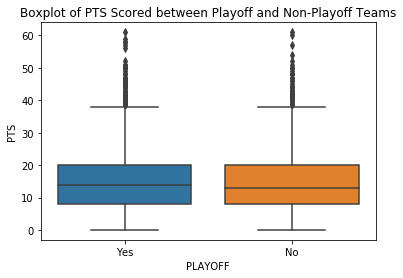

In [17]:
box = sns.boxplot(x = "PLAYOFF", y="PTS", data=data2018play)
plt.title("Boxplot of PTS Scored between Playoff and Non-Playoff Teams")

From the boxplot above it is hard to tell if there is a difference between points scored by players who play for playoff teams vs players who play for non-playoff. Running a hypothesis test on  H0: the average points scored for players who play for playoff teams vs the average points scored for players who play for non-playoff.

In [18]:
# perform t-test on the points scored by playoff teams vs the points scored by non playoff teams 
stat, p = stats.ttest_ind(playoffdata2018['PTS'], nonplayoffdata2018['PTS'], equal_var=False)
dof = len(playoffdata2018['PTS']) + len(nonplayoffdata2018['PTS']) - 2
critical = stats.t.ppf(0.95,dof)
print('Degress of Freedom = %d' % dof)
print('p value = %d' % p)
print('Test Statistic = %d' % stat)
print('Critical Value = %d' % critical)

Degress of Freedom = 13778
p value = 0
Test Statistic = 2
Critical Value = 1


From this result we can conclude that there is a significant difference between average points scored by players playing for playoff teams and the average points scored by players playing for non-playoff teams.

However, this does not tell us which a playoff teams effect on specific players. To further examine this we will look at the points scored by each position between non-playoff and playoff team players. We will test the following hypotheses: 1) H0: The average points scored by playoff guards is equal to the average points scored by non-playoff guards. 2) H0: The average points scored by playoff forwards is equal to the average points scored by non-playoff forwards. 3) H0: The average points scored by playoff centers is equal to the average points scored by non-playoff centers.

In [19]:
# playoff teams by and non-playoff teams by position
playoffdata2018C = playoffdata2018.loc[playoffdata2018['START_POSITION'] == 'C']
playoffdata2018F = playoffdata2018.loc[playoffdata2018['START_POSITION'] == 'F']
playoffdata2018G = playoffdata2018.loc[playoffdata2018['START_POSITION'] == 'G']
nonplayoffdata2018C = nonplayoffdata2018.loc[nonplayoffdata2018['START_POSITION'] == 'C']
nonplayoffdata2018F = nonplayoffdata2018.loc[nonplayoffdata2018['START_POSITION'] == 'F']
nonplayoffdata2018G = nonplayoffdata2018.loc[nonplayoffdata2018['START_POSITION'] == 'G']

Text(0.5, 1.0, 'Boxplot of PTS Scored by Guards between Playoff and Non-Playoff Teams')

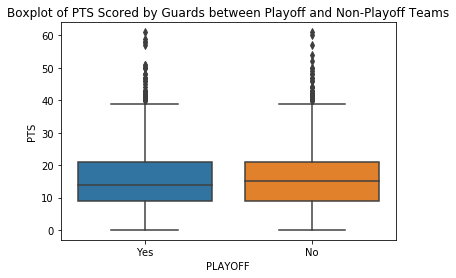

In [20]:
box = sns.boxplot(x = "PLAYOFF", y="PTS", data=data2018.loc[data2018['START_POSITION'] == 'G'])
plt.title("Boxplot of PTS Scored by Guards between Playoff and Non-Playoff Teams")

In [21]:
# perform t-test on the points guards scored by playoff teams vs the points scored by non playoff teams 
stat, p = stats.ttest_ind(playoffdata2018G['PTS'], nonplayoffdata2018G['PTS'], equal_var=False)
dof = len(playoffdata2018G['PTS']) + len(nonplayoffdata2018G['PTS']) - 2
critical = stats.t.ppf(0.95,dof)
print('Degress of Freedom = %d' % dof)
print('p value = %d' % p)
print('Test Statistic = %d' % stat)
print('Critical Value = %d' % critical)

Degress of Freedom = 5510
p value = 0
Test Statistic = -1
Critical Value = 1


From this result we can conclude that there is a significant difference between average points scored by playoff guards and the average points scored by non-playoff guards; H0 is rejected since p-value less than 0.05

Text(0.5, 1.0, 'Boxplot of PTS Scored by Forwards between Playoff and Non-Playoff Teams')

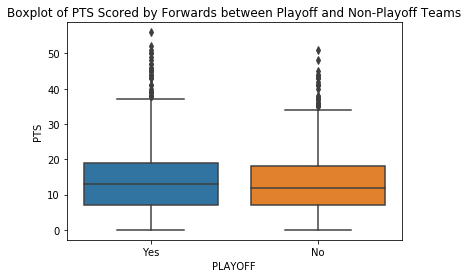

In [22]:
box = sns.boxplot(x = "PLAYOFF", y="PTS", data=data2018.loc[data2018['START_POSITION'] == 'F'])
plt.title("Boxplot of PTS Scored by Forwards between Playoff and Non-Playoff Teams")

In [23]:
# perform t-test on the points forwards scored by playoff teams vs the points scored by non playoff teams 
stat, p = stats.ttest_ind(playoffdata2018F['PTS'], nonplayoffdata2018F['PTS'], equal_var=False)
dof = len(playoffdata2018F['PTS']) + len(nonplayoffdata2018F['PTS']) - 2
critical = stats.t.ppf(0.95,dof)
print('Degress of Freedom = %d' % dof)
print('p value = %d' % p)
print('Test Statistic = %d' % stat)
print('Critical Value = %d' % critical)

Degress of Freedom = 5510
p value = 0
Test Statistic = 3
Critical Value = 1


From this result we can conclude that there is a significant difference between the average points scored by playoff forwards and to the average points scored by non-playoff forwards; H0 is rejected since p-value less than 0.05.

Text(0.5, 1.0, 'Boxplot of PTS Scored by Centers between Playoff and Non-Playoff Teams')

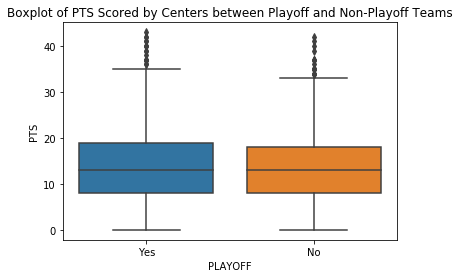

In [24]:
box = sns.boxplot(x = "PLAYOFF", y="PTS", data=data2018.loc[data2018['START_POSITION'] == 'C'])
plt.title("Boxplot of PTS Scored by Centers between Playoff and Non-Playoff Teams")

In [25]:
# perform t-test on the points centers scored by playoff teams vs the points scored by non playoff teams 
stat, p = stats.ttest_ind(playoffdata2018C['PTS'], nonplayoffdata2018C['PTS'], equal_var=False)
dof = len(playoffdata2018C['PTS']) + len(nonplayoffdata2018C['PTS']) - 2
critical = stats.t.ppf(0.95,dof)
print('Degress of Freedom = %d' % dof)
print('p value = %d' % p)
print('Test Statistic = %d' % stat)
print('Critical Value = %d' % critical)

Degress of Freedom = 2754
p value = 0
Test Statistic = 1
Critical Value = 1


From this result we can conclude that there is a significant difference between average points scored by guards and the average points scored by forwards; H0 is rejected since p-value less than 0.05.